In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import os, sys
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
IMG_SIZE = 512

In [3]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [4]:
df_train.head()

id_code  diagnosis
0  000c1434d8d7.jpg          2
1  001639a390f0.jpg          4
2  0024cdab0c1e.jpg          1
3  002c21358ce6.jpg          0
4  005b95c28852.jpg          0

In [5]:
x = df_train["id_code"]
y = df_train["diagnosis"]

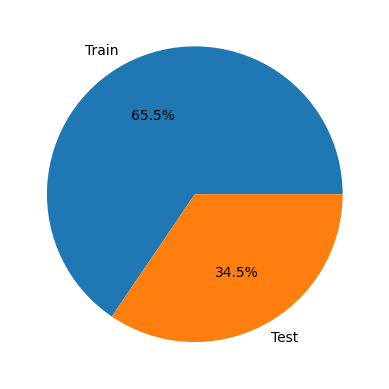

In [6]:
labels = ["Train","Test"]
sizes = [len(df_train),len(df_test)]

plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15, random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3112,)
x_test shape:  (550,)
y_train shape:  (3112,)
y_test shape:  (550,)


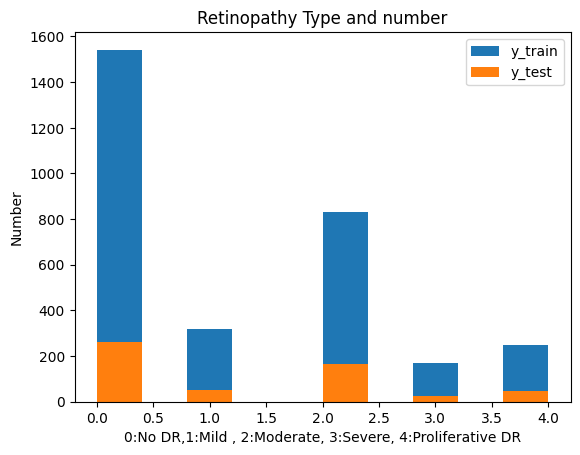

In [8]:
plt.hist(y_train,label="y_train")
plt.hist(y_test,label="y_test")
plt.title("Retinopathy Type and number")
plt.xlabel("0:No DR,1:Mild , 2:Moderate, 3:Severe, 4:Proliferative DR")
plt.ylabel("Number")
plt.legend()
plt.show()

CPU times: user 641 ms, sys: 49.1 ms, total: 690 ms
Wall time: 715 ms


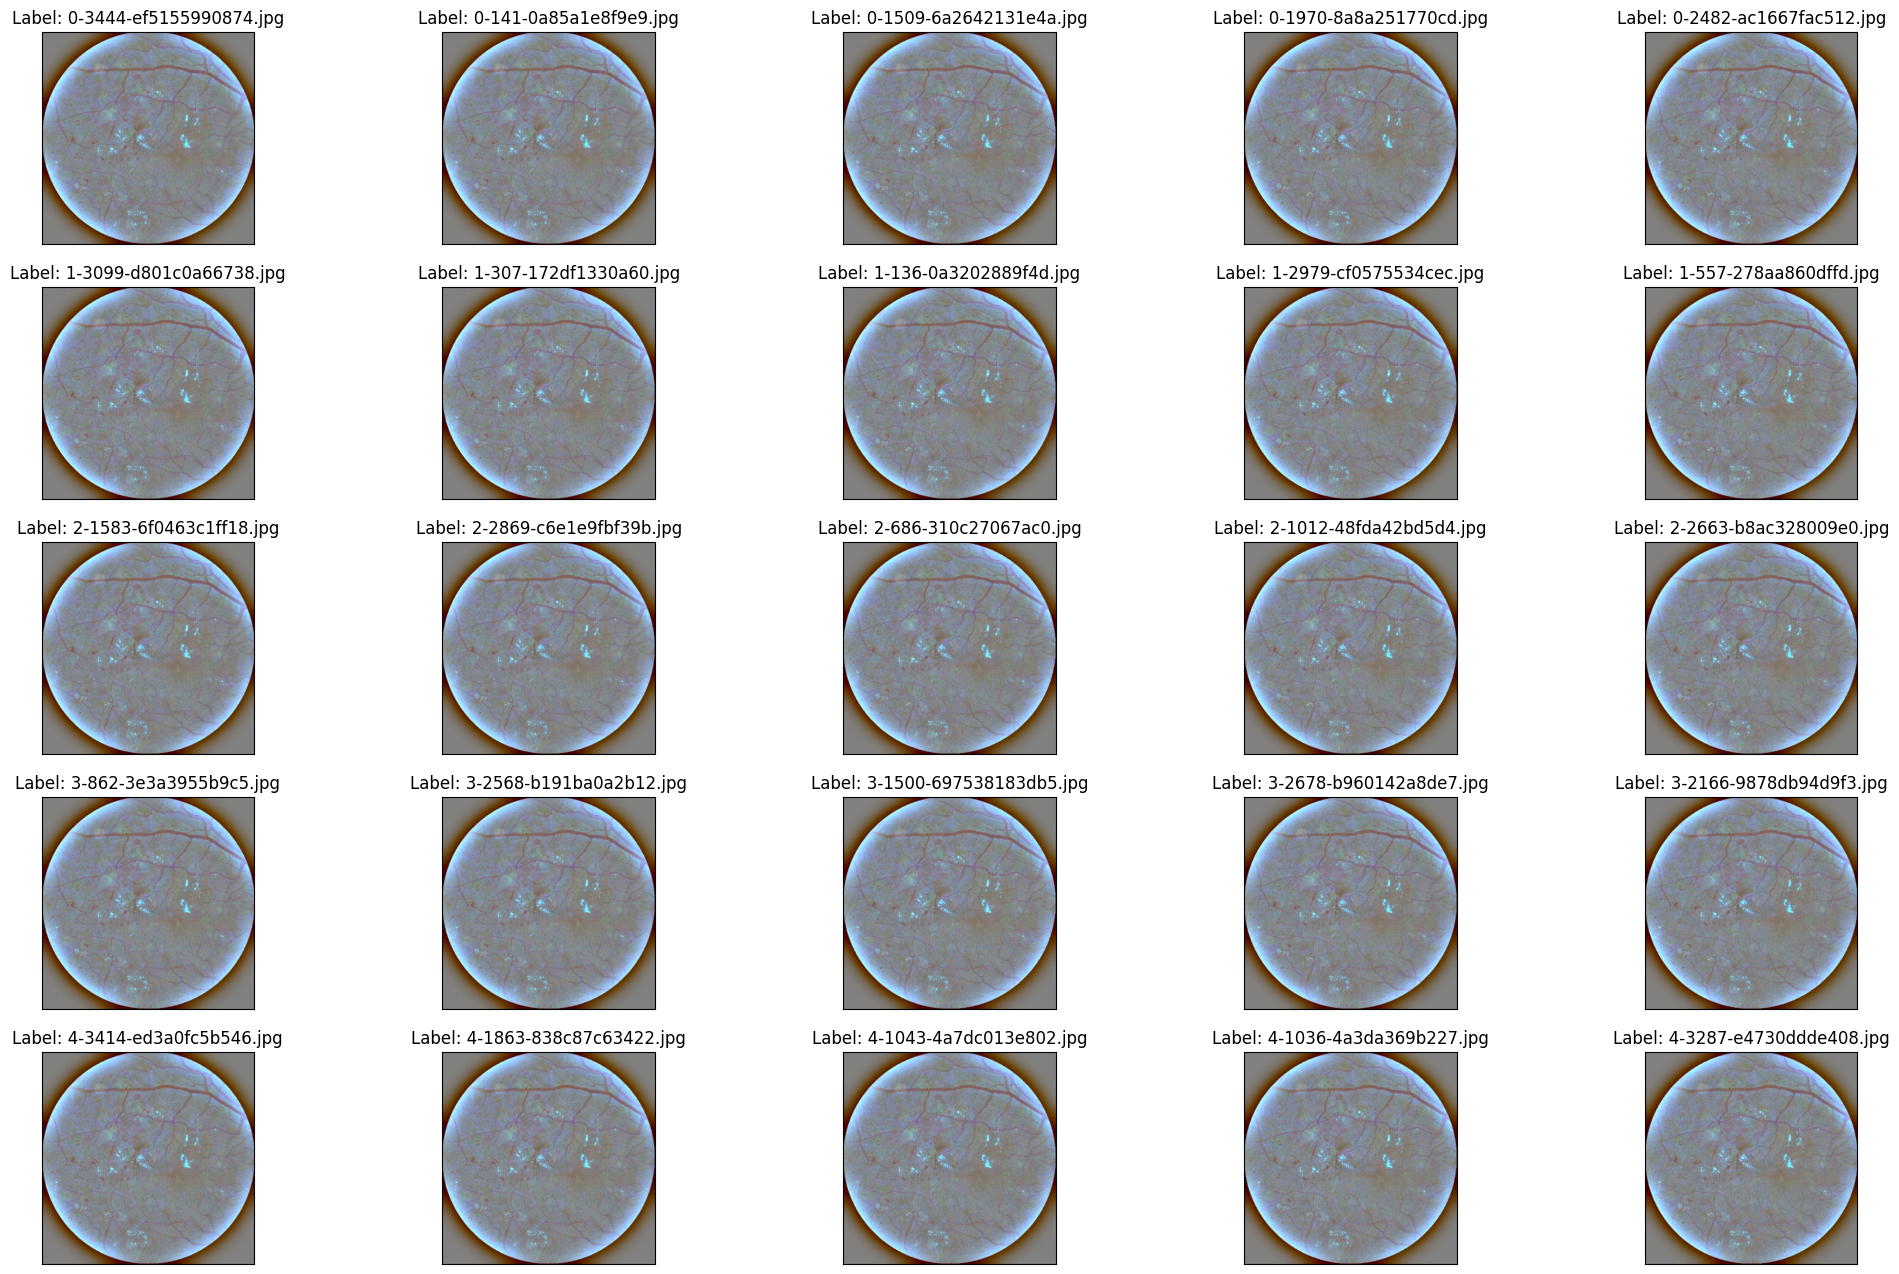

In [9]:
 %%time
fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for i in sorted(y_train.unique()):
    for j, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == i].sample(5, random_state=42).iterrows()):
        ax = fig.add_subplot(5, 5, i * 5 + j + 1, xticks=[], yticks=[])
        path=f"/content/000c1434d8d7.jpg"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (i, idx, row['id_code']) )

CPU times: user 1.17 s, sys: 16.5 ms, total: 1.19 s
Wall time: 3.27 s


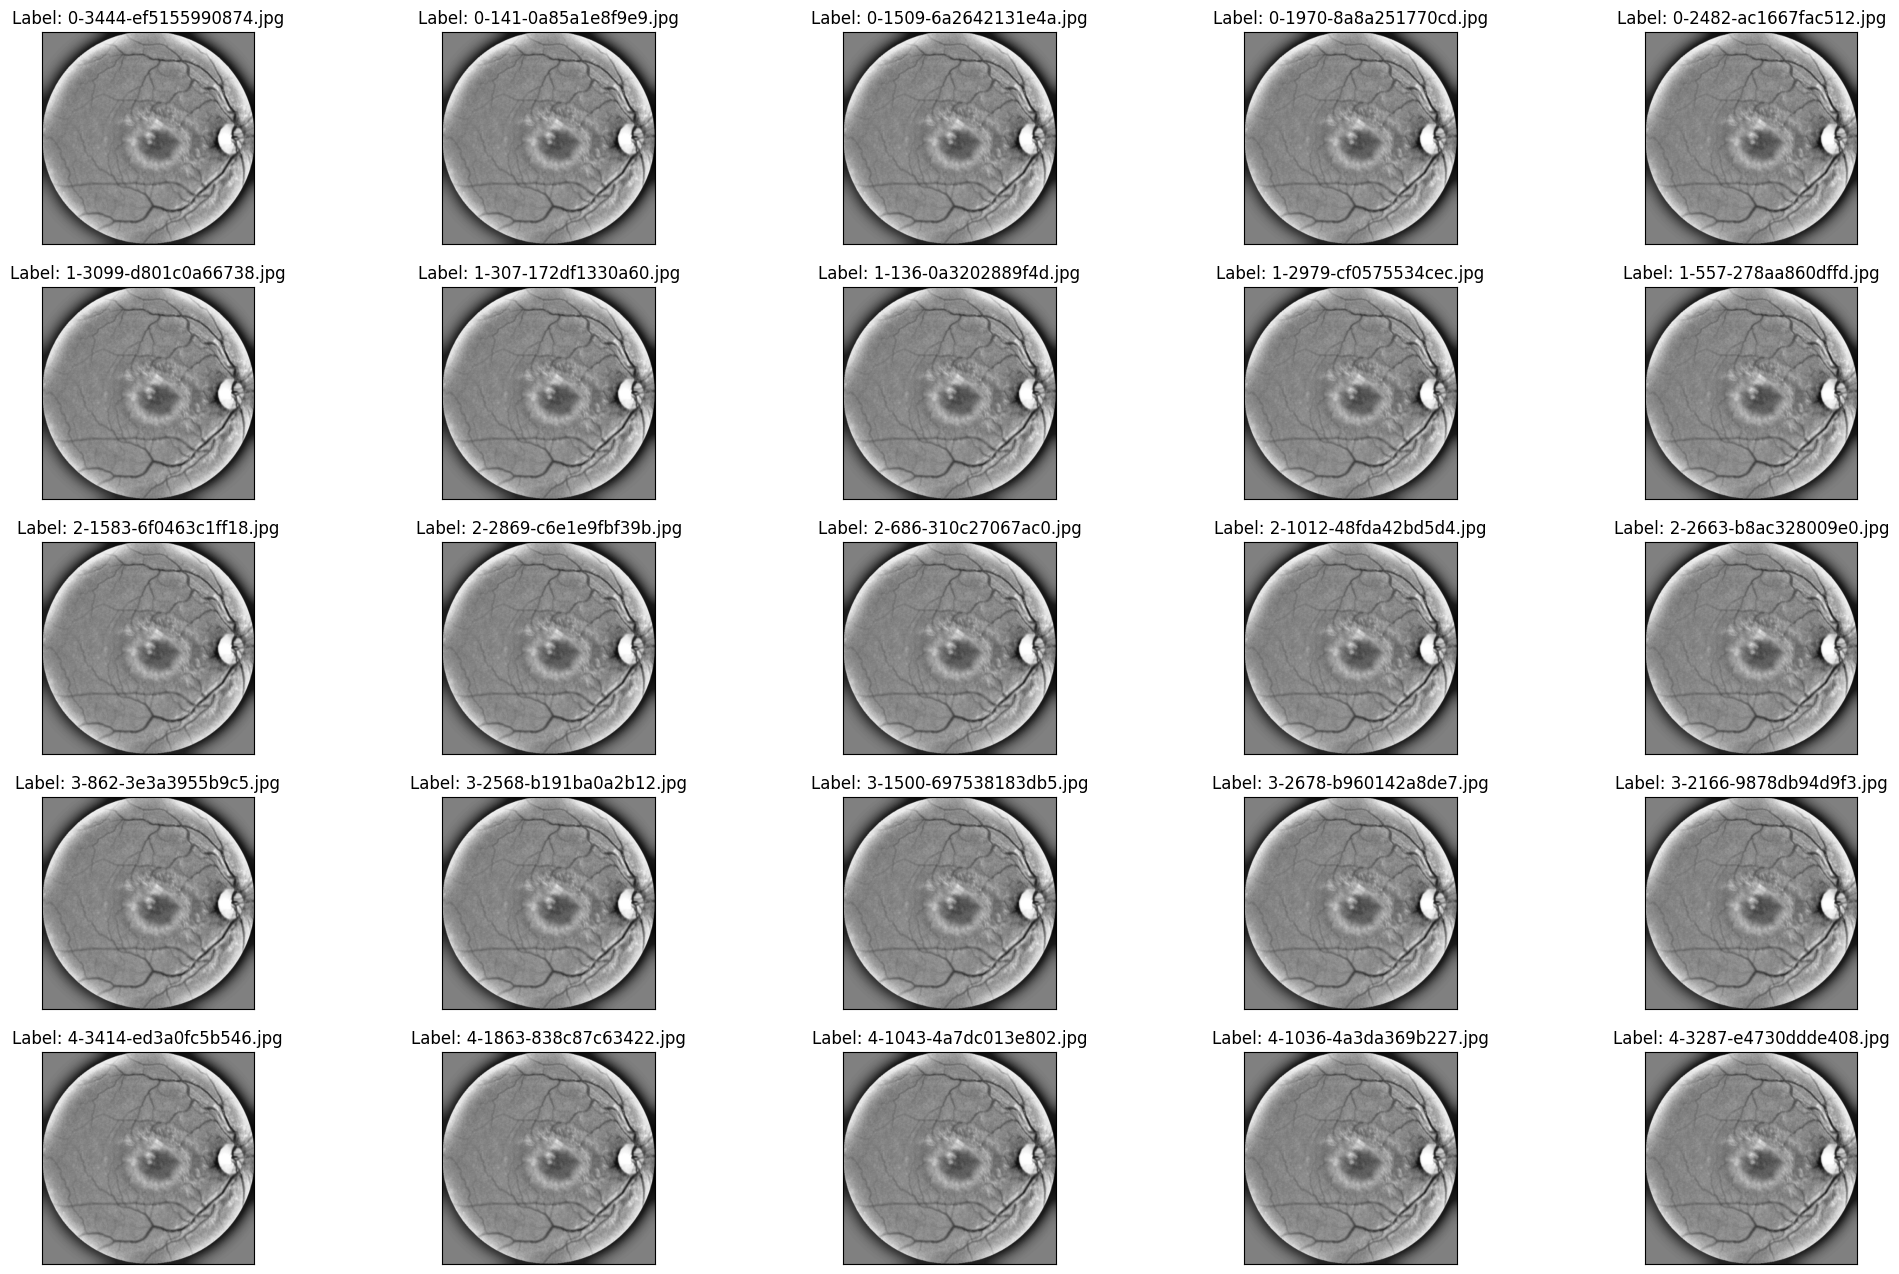

In [10]:
%%time
fig=plt.figure(figsize=(25,16))
for i in sorted(y_train.unique()):
    for j ,(idx,row) in enumerate(df_train.loc[df_train["diagnosis"]==i].sample(5,random_state=42).iterrows()):
        ax = fig.add_subplot(5, 5, i*5+j+1, xticks=[], yticks=[])
        path=f"/content/3ca8be3b40d6.jpg"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image,cmap="gray")
        ax.set_title('Label: %d-%d-%s' % (i, idx, row['id_code']) )

480 480


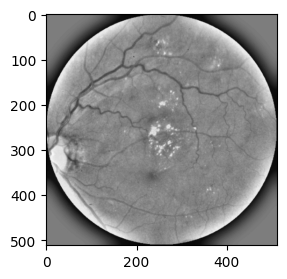

In [12]:
dpi=80

path=f"/content/00a8624548a9.jpg"
image = cv2.imread(path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
height,width=image.shape
print(height,width)
SCALE=2
figsize=(width/float(dpi))/SCALE,(height/float(dpi))/SCALE
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
fig=plt.figure(figsize=figsize)
plt.imshow(image,cmap="gray")

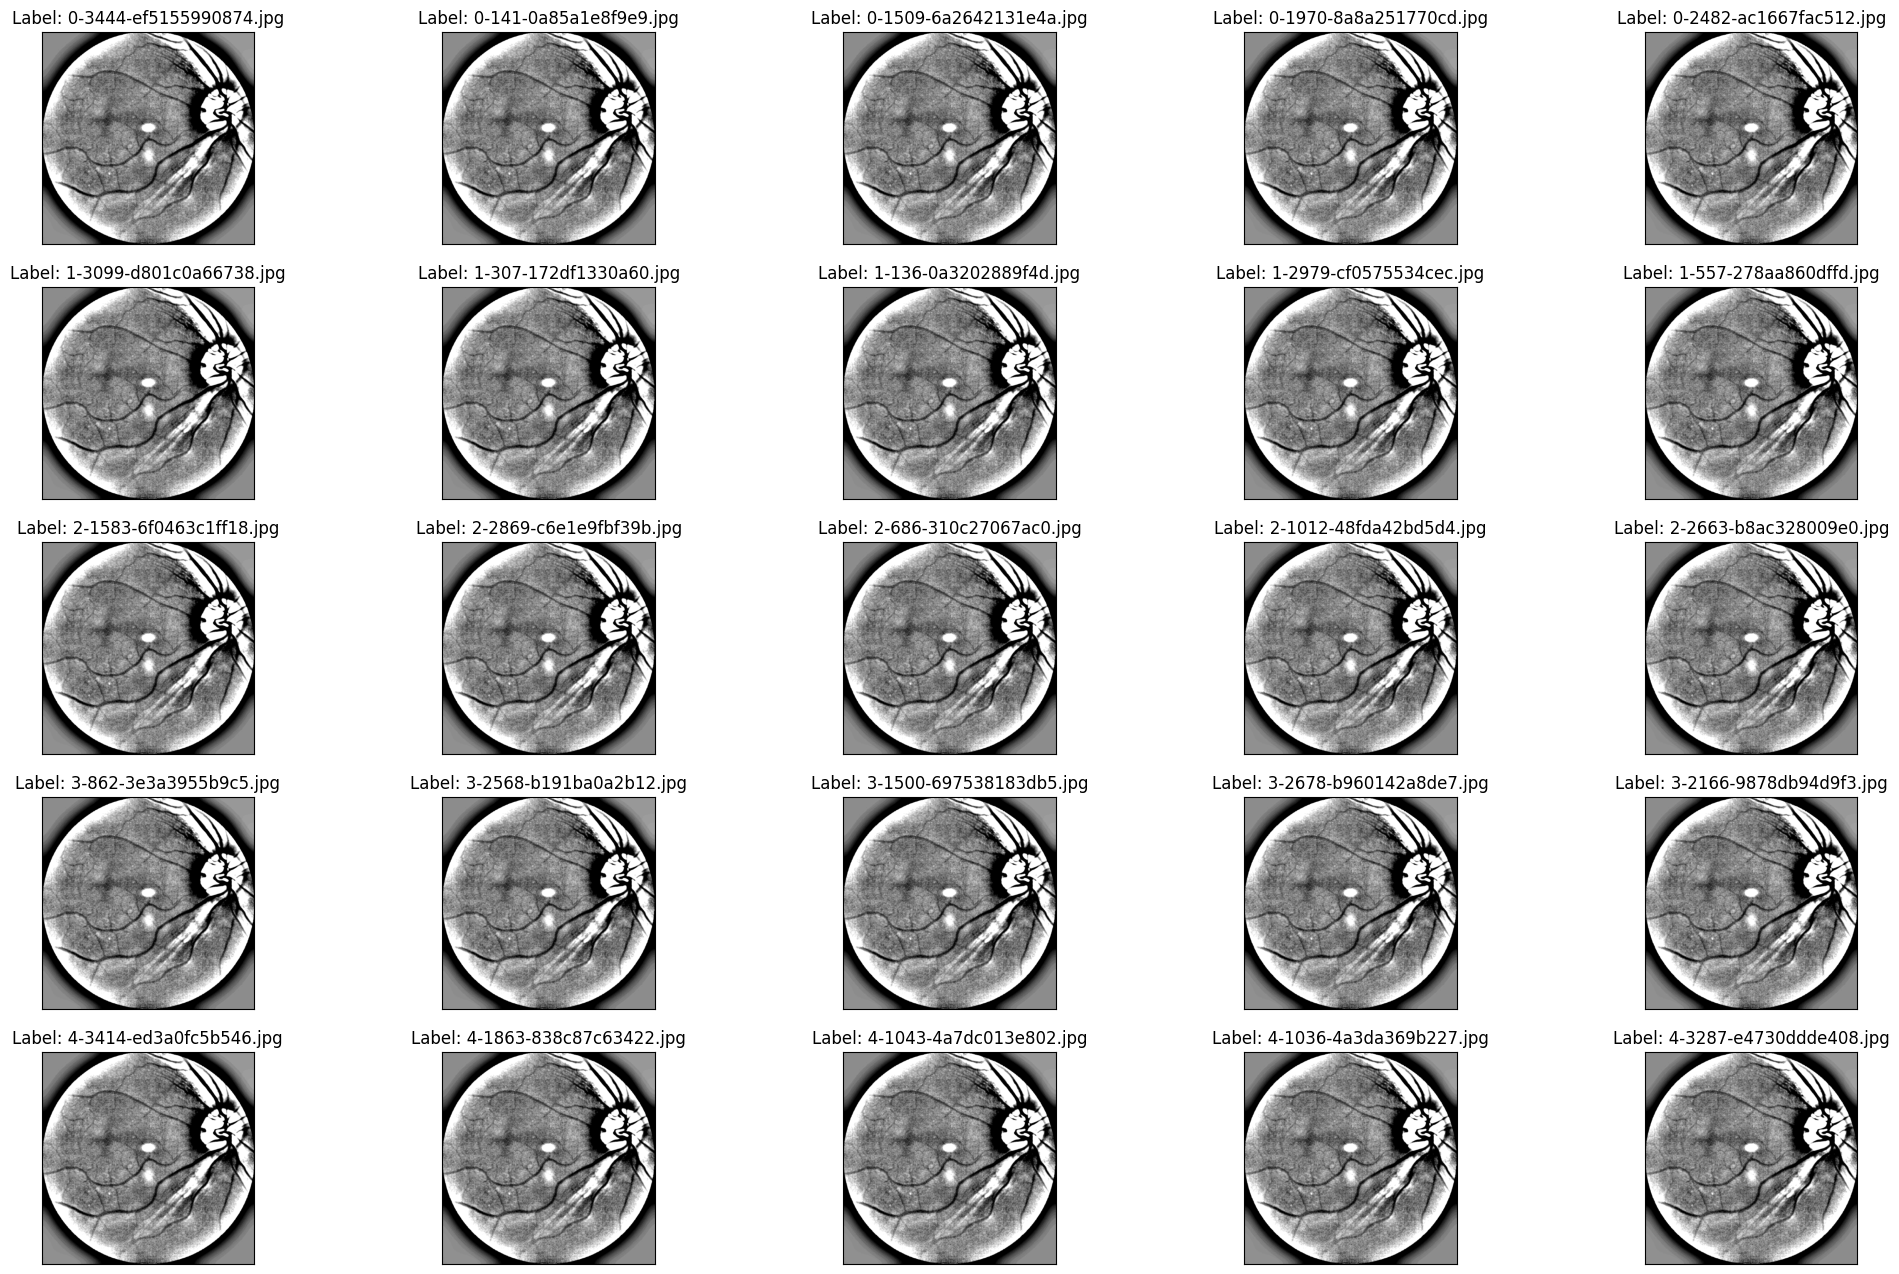

In [14]:
fig=plt.figure(figsize=(25,16))
for i in sorted(y_train.unique()):
    for j,(idx,row) in enumerate(df_train.loc[df_train["diagnosis"]==i].sample(5,random_state=42).iterrows()):

        ax = fig.add_subplot(5, 5, i*5+j+1, xticks=[], yticks=[])
        path=f"/content/0cecc2864b7f.jpg"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128)

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (i, idx, row['id_code']) )

In [15]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [16]:
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)

    return image

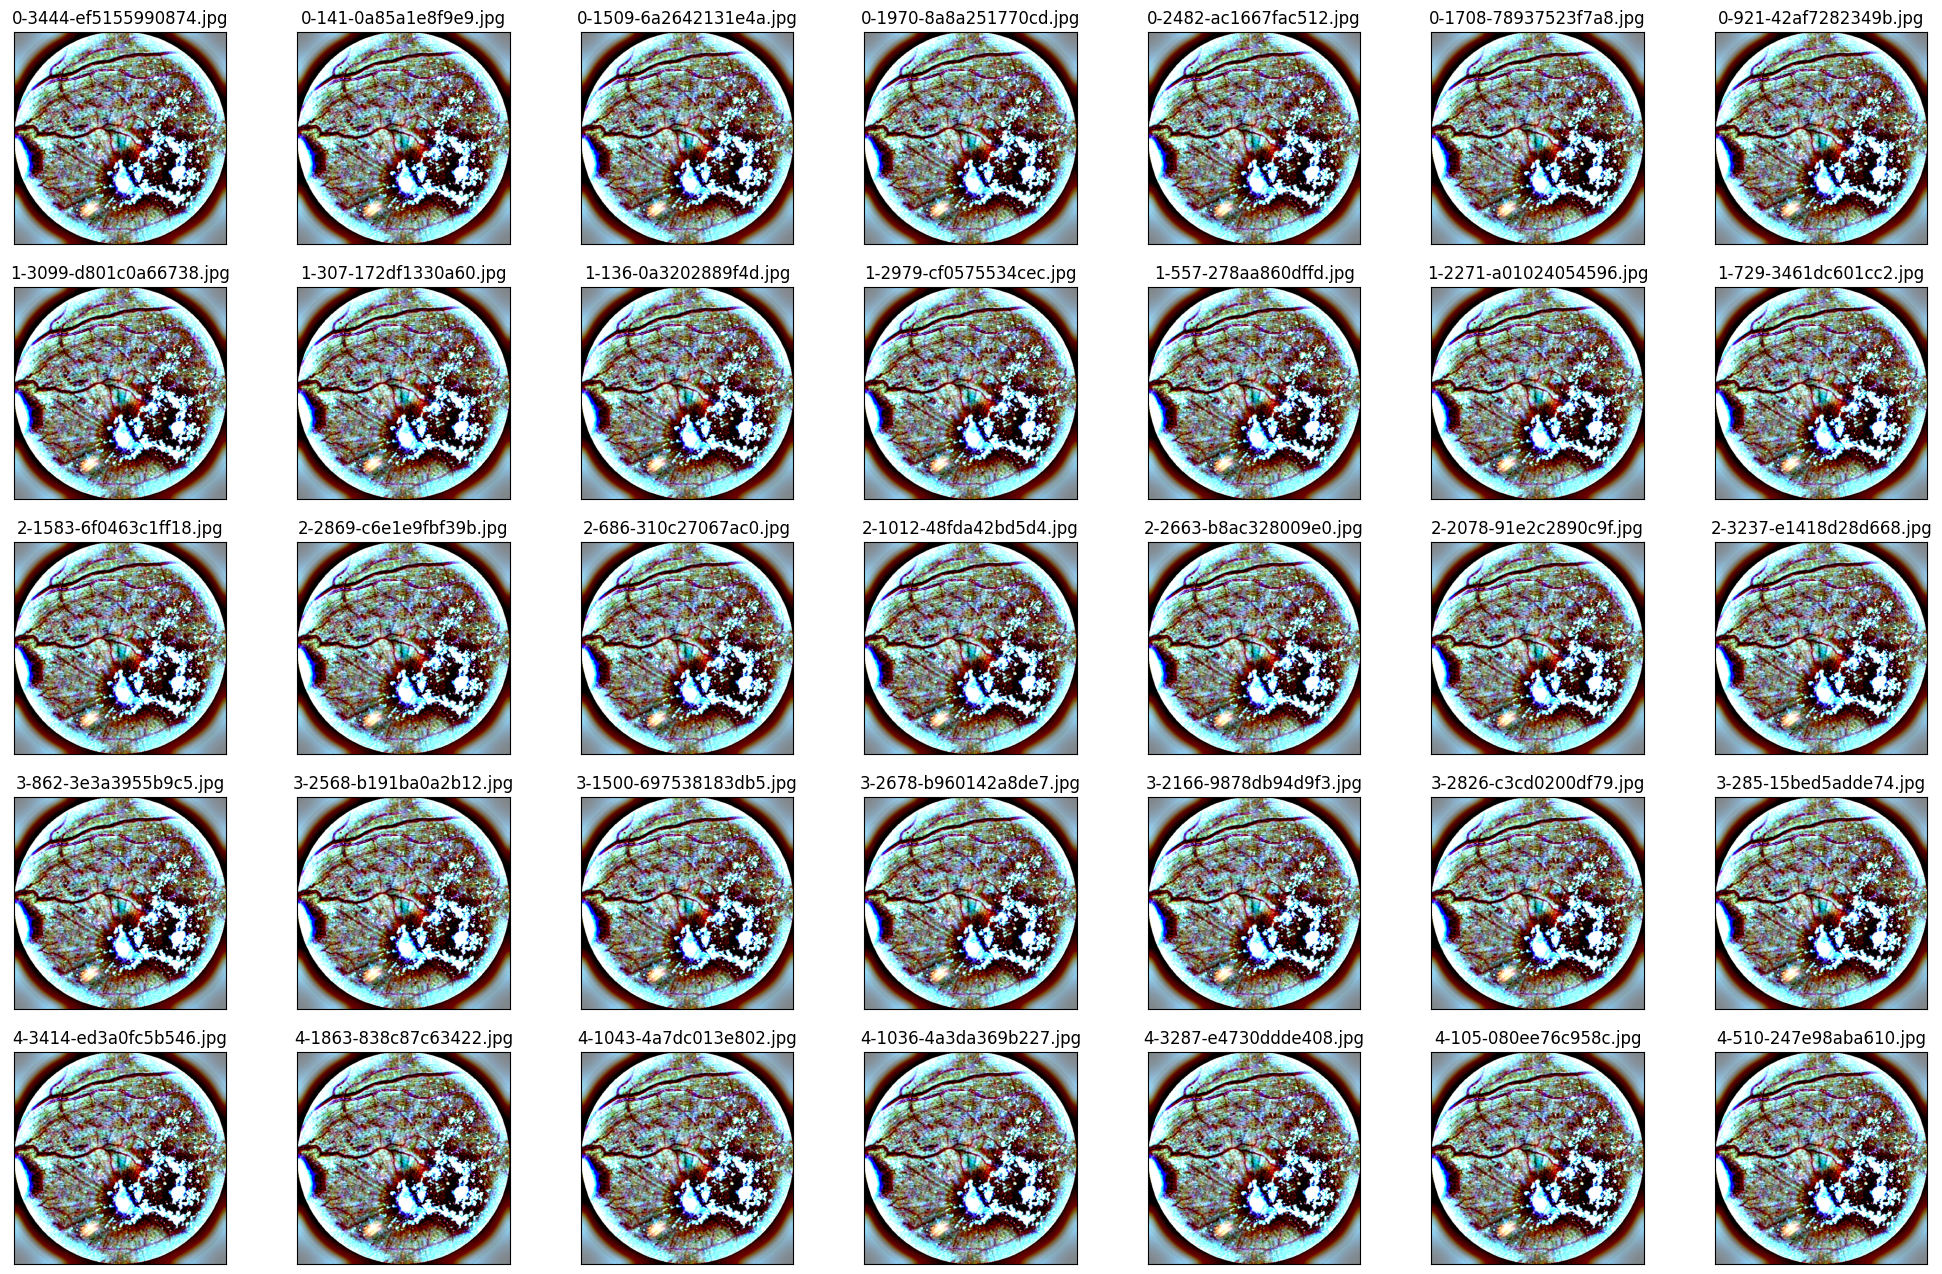

In [17]:
NUM_SAMP=7
fig = plt.figure(figsize=(25, 16))
for i in sorted(y_train.unique()):
    for j, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == i].sample(NUM_SAMP, random_state=42).iterrows()):
        ax = fig.add_subplot(5, NUM_SAMP, i* NUM_SAMP + j + 1, xticks=[], yticks=[])
        path=f"/content/d9bbdc33db83.jpg"
        image = load_ben_color(path,sigmaX=30)

        plt.imshow(image)
        ax.set_title('%d-%d-%s' % (i, idx, row['id_code']) )

In [18]:
def load_ben_color2(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))


    return image

512 512
512 512


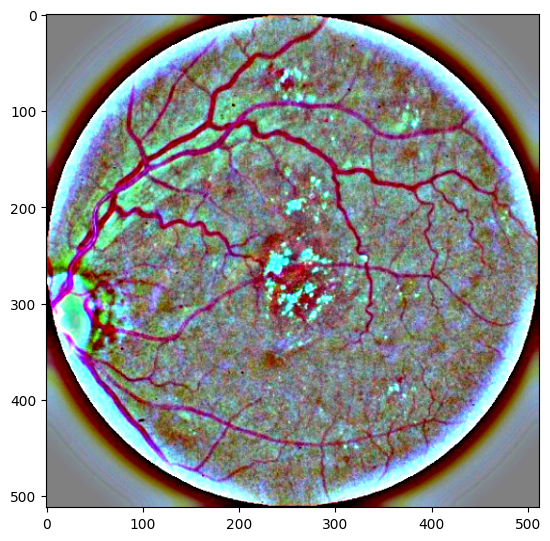

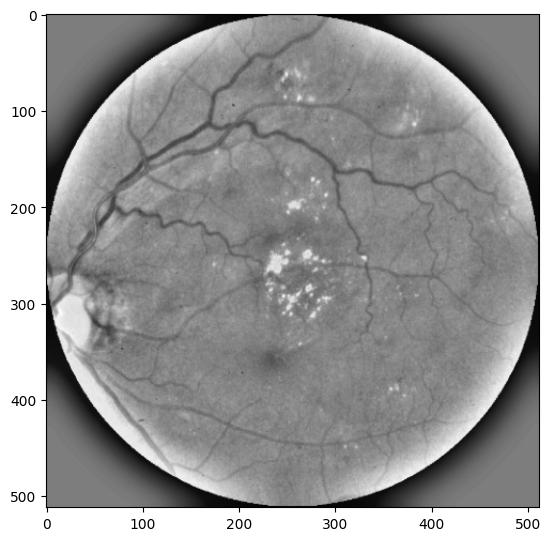

In [19]:
dpi = 80 #inch

path=f"/content/00a8624548a9.jpg"
image = load_ben_color(path,sigmaX=10)

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')

dpi = 80 #inch

path=f"/content/00a8624548a9.jpg"
image = load_ben_color2(path,sigmaX=10)

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')

512 512
512 512


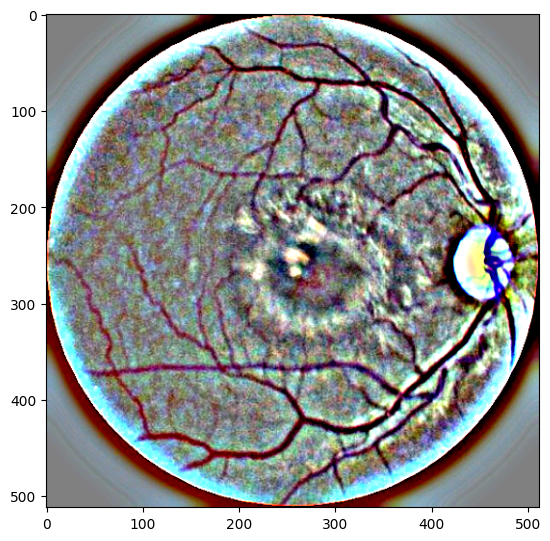

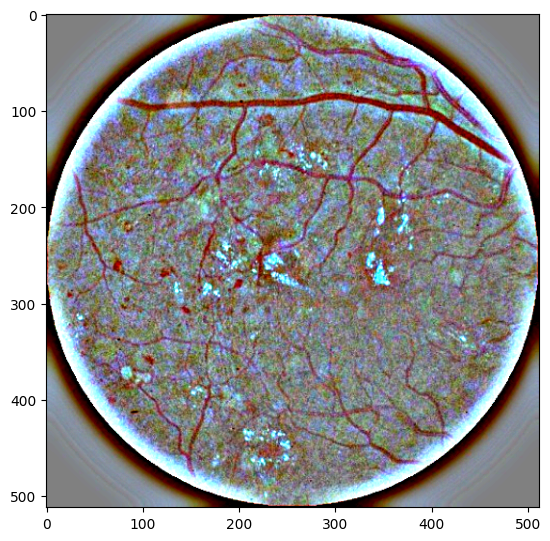

In [20]:
dpi = 80 #inch

path=f"/content/3ca8be3b40d6.jpg"
image = load_ben_color(path,sigmaX=10)

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')
dpi = 80 #inch


path=f"/content/000c1434d8d7.jpg"
image = load_ben_color(path,sigmaX=10)

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')

Detection with Logistic Regression

In [21]:
train=pd.read_csv("/content/train.csv")

In [22]:
train.head()

id_code  diagnosis
0  000c1434d8d7.jpg          2
1  001639a390f0.jpg          4
2  0024cdab0c1e.jpg          1
3  002c21358ce6.jpg          0
4  005b95c28852.jpg          0

In [23]:
patient = train[train["diagnosis"]==4]
healt = train[train["diagnosis"] == 0]
train_df=pd.concat([patient,healt])

In [24]:
train_df["diagnosis"]=[1 if i==4 else 0 for i in train_df.diagnosis]

In [25]:
train_df.shape

(2100, 2)

In [26]:
x=train_df.drop(columns=["diagnosis"])
y=train_df.diagnosis
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [27]:
dn_x = [ Image.open('/content/d9bbdc33db83.jpg') for i in x_train.id_code[:5]]

In [28]:
dn_x

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x480>]

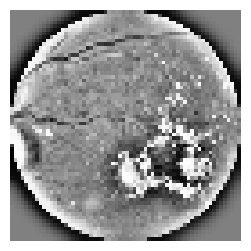

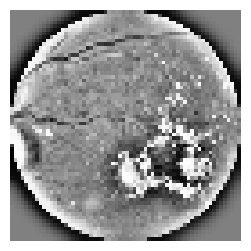

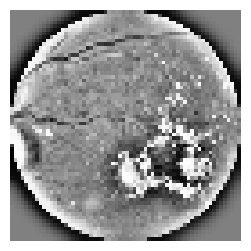

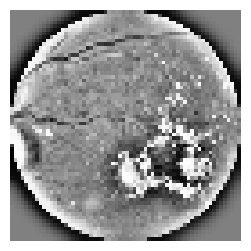

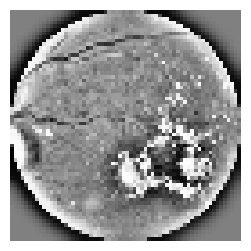

In [29]:
for i in dn_x:
    plt.figure(figsize=(5,3))
    i = cv2.resize(np.asarray(i),(64,64))
    i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    plt.imshow(i,cmap="gray")
    plt.axis("off")
    plt.show

In [30]:
x_train = [cv2.resize(np.asarray(Image.open('/content/0cecc2864b7f.jpg').convert("L")),(64,64)) for i in x_train.id_code]

In [31]:
x_test = [cv2.resize(np.asarray(Image.open('/content/3ca8be3b40d6.jpg').convert("L")),(64,64)) for i in x_test.id_code]

In [37]:
x_test=np.array(x_test)
x_test.shape



(630, 64, 64)

In [35]:
x_train=np.array(x_train)
x_train.shape


(1470, 64, 64)

In [38]:
x_train_flatten=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flatten=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [39]:
x_train=x_train_flatten.T
y_train=y_train.T
x_test=x_test_flatten.T
y_test=y_test.T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (4096, 1470)
x_test:  (4096, 630)
y_train:  (1470,)
y_test:  (630,)


In [40]:
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

y_train:  (1470, 1)
y_test:  (630, 1)
